# ABS Quarterly Wage Price Index 6345

## Python set-up

In [1]:
# system imports
import sys
import pathlib  
import re

# analytic imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# local imports
from finalise_plot import finalise_plot, set_chart_dir
from abs_common import (
    get_fs_constants,
    get_plot_constants,
    get_ABS_meta_and_data,
    get_identifier,
    plot_growth2,
    clear_chart_dir,
)

# pandas display settings
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 100

# plotting stuff
plt.style.use('fivethirtyeight')

In [2]:
catalogue_id = '6345'
source, CHART_DIR, META_DATA = get_fs_constants(catalogue_id)

## Get data from ABS

In [3]:
# do the data capture and extraction to a DataFrame
abs_dict = get_ABS_meta_and_data(catalogue_id)
if abs_dict is None:
    sys.exit(-1)

Found URL for a ZIP file on ABS web page
Cache looks stale: Removing old cache version
We need to download this file from the ABS ...
Saving ABS download to cache.
Extracting DataFrames from the zip-file ...


## Plot

### Set-up some constants we will use across all plots

In [4]:
meta = abs_dict[META_DATA]
RECENT, plot_times, plot_tags = get_plot_constants(meta)

### Remove the old charts

In [5]:
clear_chart_dir(CHART_DIR)
set_chart_dir(CHART_DIR)

### Headline WPI for Australia

In [6]:
table = '1'
data = abs_dict[table]
print(data.index.freq)
series_type = 'Original'
select = 'Percentage Change from Corresponding Quarter of Previous Year'
selected = meta[
    (meta.Table == table)
    & (meta['Series Type'] == series_type)
    & meta['Data Item Description'].str.contains(select)
]

text = 'Total hourly rates of pay excluding bonuses ;  Australia'
count = 0
dict = {}
for start, plot_tag in zip(plot_times, plot_tags):
    for series_id, desc in zip(selected['Series ID'],
                               selected['Data Item Description']):
        
        # get the title
        title = desc.replace(select, '').replace(text, '').replace(';', '').strip()
        title = re.sub(' +', ' ', title)
    
        # get the data
        plot_data = data[series_id].dropna()
        plot_data = plot_data[plot_data.index >= pd.Period(start, freq=data.index.freq)] if start else plot_data
        
        # capture first two for comparative chart - public v private:
        if count < 2:
            dict[title] = plot_data
            count += 1

        # and plot
        ax = plot_data.plot(lw=2, color='#dd0000')
        finalise_plot(
            ax, 
            title=f'Annual Wage Growth: {title}', 
            ylabel='Per cent per annum', 
            tag=plot_tag,
            rfooter=f'{source} {table}',
            lfooter=text,
            #show=True,
        )        

<QuarterEnd: startingMonth=12>


### WPI Public vs Private

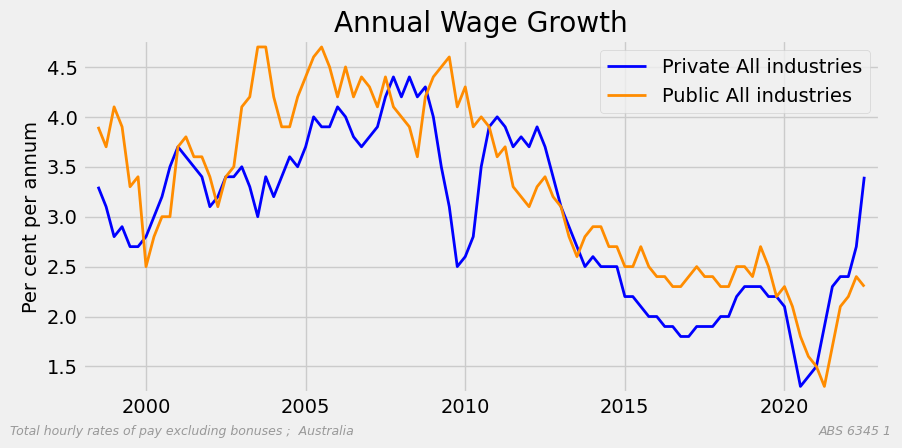

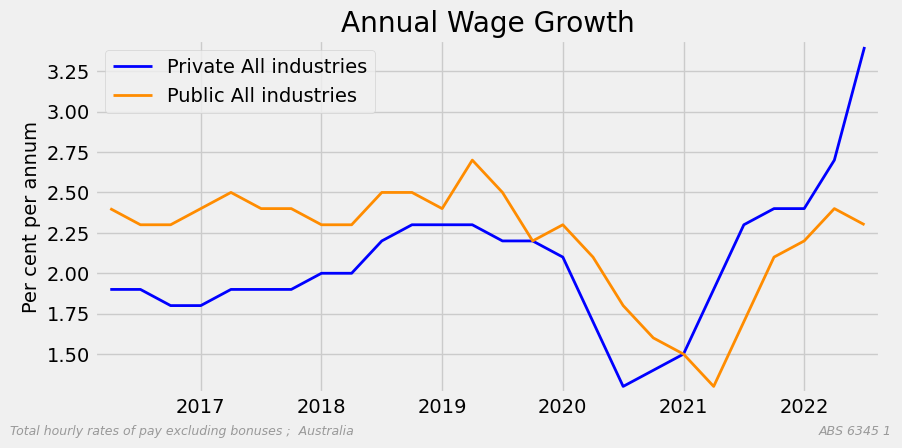

In [7]:
plot_data = pd.DataFrame(dict)
title = 'Annual Wage Growth'
for start, plot_tag in zip(plot_times, plot_tags):
    plot_data = plot_data[plot_data.index >= pd.Period(start, freq=data.index.freq)] if start else plot_data
    ax = plot_data.plot(lw=2, color=['blue', 'darkorange'])
    finalise_plot(
        ax, 
        title=title, 
        ylabel='Per cent per annum', 
        tag=plot_tag,
        rfooter=f'{source} {table}',
        lfooter=text,
        show=True,
    )        

## Finished

In [8]:
# watermark
%load_ext watermark
%watermark -u -n -t -v -iv -w

Last updated: Sat Feb 18 2023 09:55:49

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.10.0

pandas    : 1.5.3
re        : 2.2.1
sys       : 3.11.0 | packaged by conda-forge | (main, Jan 15 2023, 05:44:48) [Clang 14.0.6 ]
numpy     : 1.24.2
matplotlib: 3.7.0

Watermark: 2.3.1



In [9]:
print('Finished')

Finished
